In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load and preview the dataset
data = pd.read_csv('data.csv')
print("Sample of the dataset:")
print(data.head())


Sample of the dataset:
         date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  


In [3]:

# Check for missing and duplicate values
print("\nMissing values per column:")
print(data.isnull().sum())
print(f"\nTotal duplicated rows: {data.duplicated().sum()}")


Missing values per column:
date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

Total duplicated rows: 0


In [4]:
# Convert date columns to datetime
data['date'] = pd.to_datetime(data['date'])
data['datetime'] = pd.to_datetime(data['datetime'])

In [6]:
# Feature engineering: extract time-based features
data['month'] = data['date'].dt.to_period('M')
data['weekday'] = data['date'].dt.day_name()
data['hour'] = data['datetime'].dt.hour

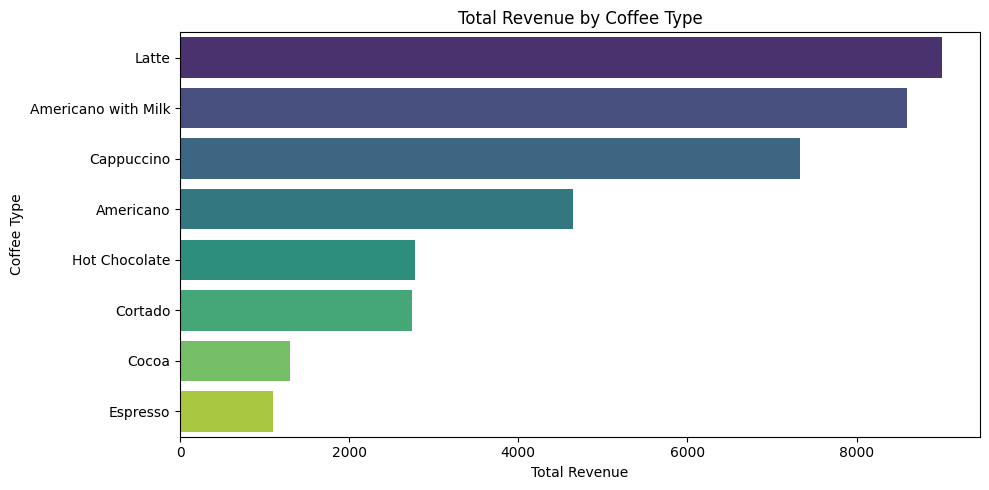

In [11]:
revenue_summary = data.groupby('coffee_name')['money'].sum().reset_index().sort_values(by='money', ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(data=revenue_summary, x='money', y='coffee_name', hue='coffee_name', palette='viridis')
plt.title("Total Revenue by Coffee Type")
plt.xlabel("Total Revenue")
plt.ylabel("Coffee Type")
plt.tight_layout()
plt.show()


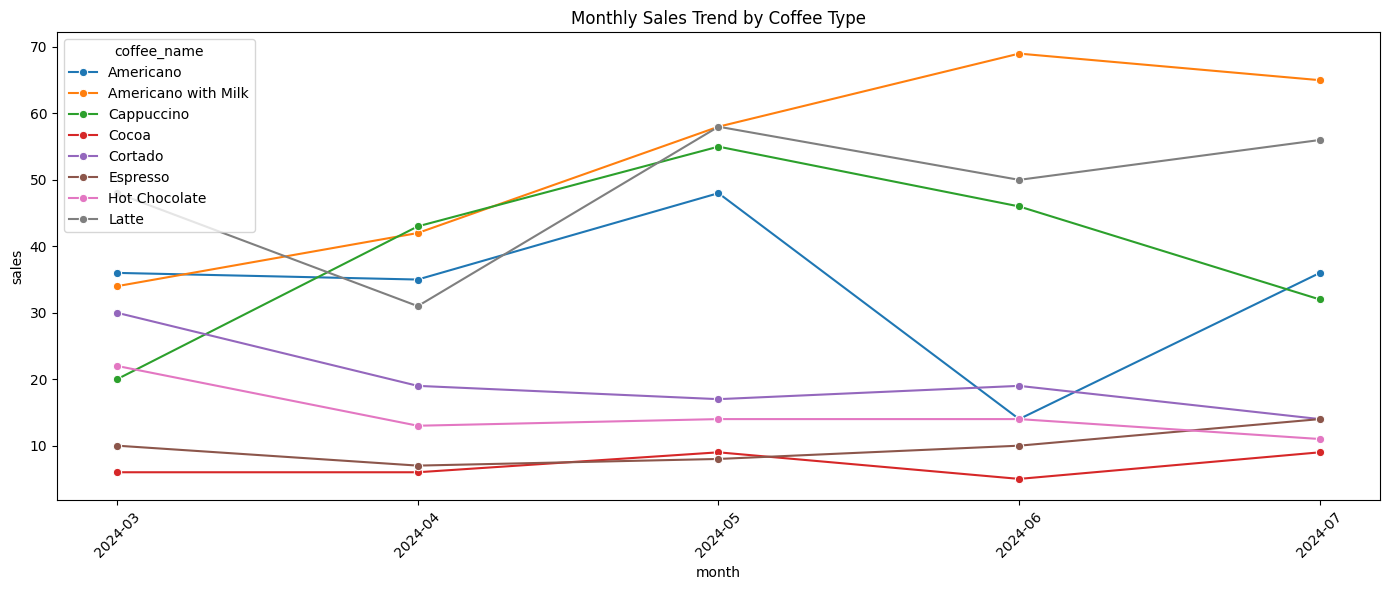

In [12]:
# --- Monthly Sales Trend ---
# Monthly Sales Trend (Fix: convert Period to string)
monthly_sales = data.groupby(['month', 'coffee_name']).size().reset_index(name='sales')
monthly_sales['month'] = monthly_sales['month'].astype(str)  # Fix the Period dtype issue

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='month', y='sales', hue='coffee_name', marker='o')
plt.title("Monthly Sales Trend by Coffee Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


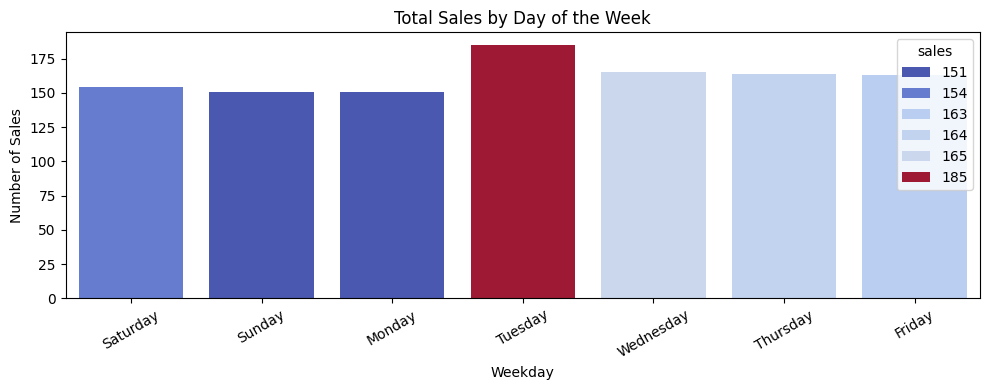

In [21]:
# --- Weekly Sales Volume ---
weekday_order = [ 'Saturday', 'Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',]
weekday_sales = data['weekday'].value_counts().reindex(weekday_order)

# Convert to DataFrame for seaborn compatibility
weekday_sales_df = pd.DataFrame({
    'weekday': weekday_sales.index,
    'sales': weekday_sales.values
})

plt.figure(figsize=(10, 4))
sns.barplot(data=weekday_sales_df, x='weekday', y='sales', hue='sales', palette='coolwarm')
plt.title("Total Sales by Day of the Week")
plt.ylabel("Number of Sales")
plt.xlabel("Weekday")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


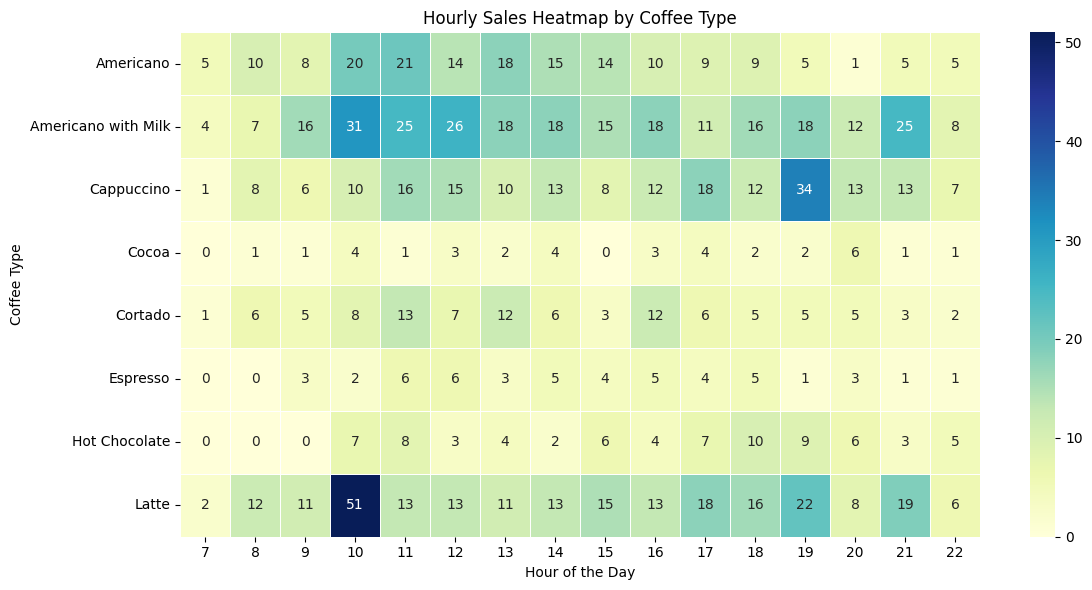

In [26]:
hourly_coffee_sales = data.groupby(['hour', 'coffee_name']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(hourly_coffee_sales.T, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='d')
plt.title("Hourly Sales Heatmap by Coffee Type")
plt.xlabel("Hour of the Day")
plt.ylabel("Coffee Type")
plt.tight_layout()
plt.show()

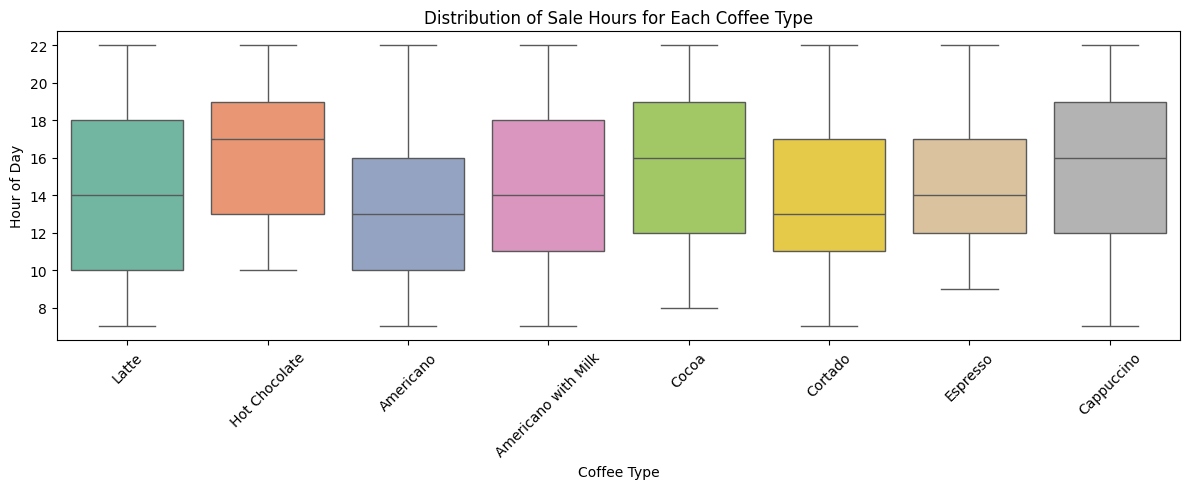

In [31]:
# Convert hour to numeric
data['hour'] = data['hour'].astype(int)

plt.figure(figsize=(12, 5))
sns.boxplot(data=data, x='coffee_name', y='hour', hue='coffee_name', palette='Set2')
plt.title("Distribution of Sale Hours for Each Coffee Type")
plt.ylabel("Hour of Day")
plt.xlabel("Coffee Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [41]:
hourly_sales_total = data.groupby('hour').size().reset_index(name="count").sort_values(by="count",ascending=False)

hourly_sales_total.head(10)


,hour,count
3,10,133
4,11,103
12,19,96
5,12,87
6,13,78
9,16,77
10,17,77
7,14,76
11,18,75
14,21,70


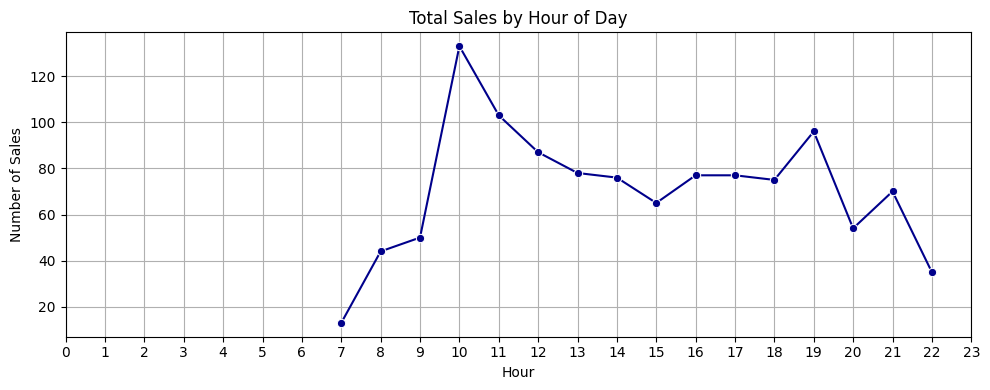

In [32]:
hourly_sales_total = data.groupby('hour').size().reset_index(name='count')

plt.figure(figsize=(10, 4))
sns.lineplot(data=hourly_sales_total, x='hour', y='count', marker='o', color='darkblue')
plt.title("Total Sales by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Sales")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()
